In [125]:
# Loading the required packages for loading the dataset
import pandas as pd # Loading the dataset 
import numpy as np # applying any mathematical operations on it
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [126]:
# Loading the dataset 
titanic = sns. load_dataset('titanic')


In [127]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Description of data

In [128]:
# survival Survival 0 = No, 1 = Yes
# pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
# sex Sex
# Age Age in years
# sibsp # of siblings / spouses aboard the

#                      sibsp: The dataset defines family relations in this way...
#                      Sibling = brother, sister, stepbrother, stepsister
#                      Spouse = husband, wife (mistresses and fiancés were ignored)
# parch # of parents / children aboard the Titanic

#                     parch: The dataset defines family relations in this way...
#                     Parent = mother, father
#                     Child = daughter, son, stepdaughter, stepson
#                     Some children travelled only with a nanny, therefore parch=0 for them.  
# ticket Ticket number

# fare Passenger fare
# cabin Cabin number
# embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# alive Alive person on ship
# alone Travelling alone on ship

## Steps needed to be followed:

In [129]:
titanic.shape

(891, 15)

In [130]:
# check the information and know its dtype.
# Checking null values if the values are persent then replace it.
# Describe method to get stat understanding.
# Identify the unique elements for all columns.
# Check for improper string and replace it with proper string.
# Cross check all the above steps

In [131]:
# Step 1 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [132]:
# Step 2
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

From the above i can see that there are null value present inside two different columns i.e. age and embark_town. We need to handle it using mean,median, mode.

In [133]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [134]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

From the above observation we can see that embarked and embarked_town have only two missing value and both of the column represent the same thing so what can we do is that we can remove any one column and replace the missing value with other value.

In [136]:
titanic.drop(columns=['embark_town'], inplace=True,axis=1)

In [13]:
# Here i am droping all the null values.
titanic.dropna(inplace=True)

In [139]:
# rechecking the null values
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
deck          0
alive         0
alone         0
dtype: int64

## Check the unique values for Columns Wise

In [29]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [31]:
titanic['embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [32]:
titanic['class'].unique()

['First', 'Third', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [33]:
titanic['who'].unique()

array(['woman', 'man', 'child'], dtype=object)

In [34]:
titanic['adult_male'].unique()

array([False,  True])

In [35]:
titanic['deck'].unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [36]:
titanic['embark_town'].unique()

array(['Cherbourg', 'Southampton', 'Queenstown'], dtype=object)

In [37]:
titanic['alive'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
titanic['alone'].unique()

array([False,  True])

In [140]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.666667,1.199005,34.902587,0.447761,0.442786,76.305307
std,0.472582,0.529338,15.075359,0.631274,0.733458,74.891320
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,28.712500
50%,1.000000,1.000000,33.000000,0.000000,0.000000,55.000000
75%,1.000000,1.000000,47.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [17]:
# checking all the unique element in my data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Drawing the Histogram

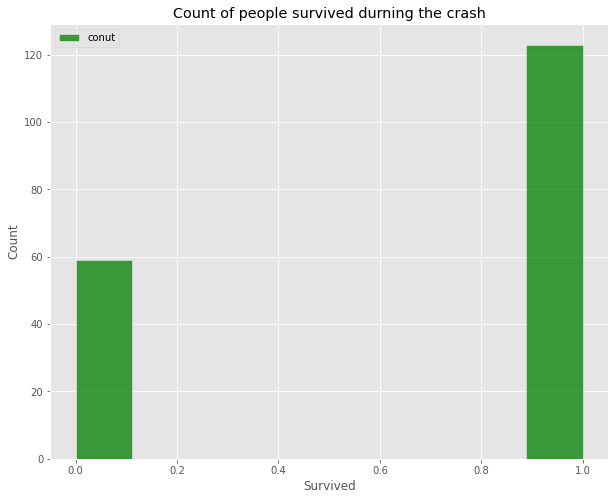

In [88]:
# creating a histogram and checking the count of people survived the crash
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(10,8))
sns.histplot(data=titanic,x='survived', color='g',label='conut')
plt.title('Count of people survived durning the crash')
plt.xlabel('Survived')
plt.legend()
plt.show()

In [90]:
titanic['survived'].value_counts()

1    123
0     59
Name: survived, dtype: int64

From the above observation we can see the count of how many people survived durning the crash.

If the value is 0 that means Not survived.

If the value is 1 that means survived.

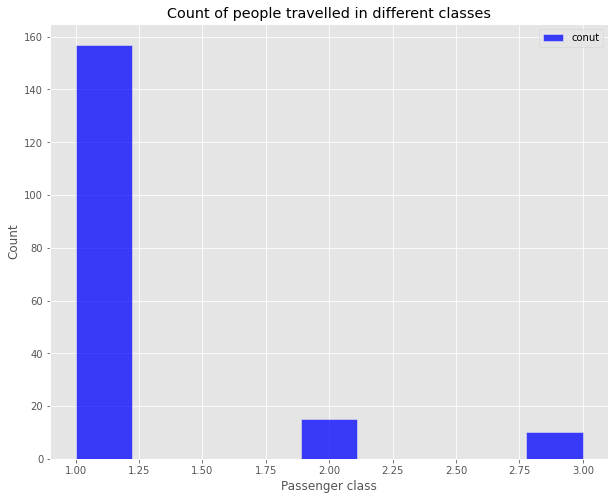

In [101]:
# Creating a histogram for counting the number of people travalled in different class group

plt.figure(figsize=(10,8))
sns.histplot(data=titanic,x='pclass', color=['b'],label='conut')
plt.title('Count of people travelled in different classes')
plt.xlabel('Passenger class')
plt.legend()
plt.show()

In [100]:
titanic['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

From the above we can see that there are 3 different class group people travelling in and from the plot we can see that the count of people travelling in class 3 is the most and then followed by the count of people 1 class and then few of them travelled in 2 class.

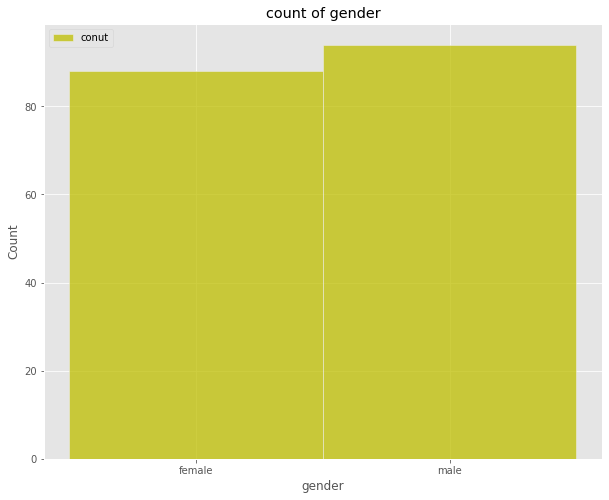

In [104]:
plt.figure(figsize=(10,8))
sns.histplot(data=titanic,x='sex', color='y',label='conut')
plt.title('count of gender')
plt.xlabel('gender')
plt.legend()
plt.show()

In [106]:
titanic['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

From the above we can see that male travel the most than compare to female 

In [108]:
# SURVIVES VS CLASS

fig = px.bar(titanic,x='survived', y='class',color='sex',height=400)
fig.show()

The above plot only represent to those who have survived the crash based on different class group with respect to male and female.

In [110]:
# SURVIVES VS EMBARKED
fig = px.bar(titanic,x='survived', y='embarked',color='sex',height=400)
fig.show()

we can see that from port Southapton those who have board the ship have survived the most and in that also female was heightest.


# Which gender had a better chance of survival?

In [48]:
## Which gender had a better chance of survival?
fig = px.bar(titanic,x='sex',y='survived',title='Chance of suevival amoung Male and Female',color='who', height=500, orientation='v')
fig.show()

In [42]:
fig = px.pie(titanic, values=titanic['survived'], names=titanic['sex'],hover_data=['who'],title='survival amoung Male and Female')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

from the above graph the female survived rate high then male and also female has 66.7% supervived then male because male survived rate less than to male

## Which social class had a better chance of survival?

In [44]:
fig = px.bar(titanic,x='class',y='survived',title='Chance of suevival class',color='who', orientation='v')
fig.show()

## Which age group had a better chance of survival?

In [59]:
titanic.groupby([ 'age'])['survived'].sum().max()

8

In [56]:
fig = px.pie(titanic, values=titanic['survived'], names=titanic['age'],title='survival according to age',)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

## Who was the oldest passenger aboard the ship?

In [79]:
titanic['age'].max()

80.0

In [112]:
fig = px.histogram(titanic,x='age',color='sex',title='Age group that travelled on ship')

fig.show()

From the above we can see that upto 80 years people travelled on ship that to specifically its 'male' and also the count of male are high than female.

## How much did the cheapest ticket cost?

In [81]:
titanic.sort_values(by=['fare']).head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
872,0,1,male,33.0,0,0,5.0,S,First,man,True,B,Southampton,no,True


## What was the range of ticket prices?

In [82]:
titanic['fare'].max()

512.3292

In [83]:
titanic['fare'].min()

0.0

range of ticket price between 0 to 512